# Train데이터 불러오기

각 년도별 DataFrame을 리스트에 append합니다.

리스트 인덱스별로

0: 2017년도 데이터   

1: 2018년도 데이터 

2: 2019년도 데이터 

3: 202년도 데이터 

입니다

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import warnings

RANDOM_STATE = 42
np.seed = 42
DATA_PATH = "../data_0113/"

warnings.filterwarnings(action='ignore')
PATH_2017 = DATA_PATH + "train/KNOW_2017.csv"
PATH_2018 = DATA_PATH + "train/KNOW_2018.csv"
PATH_2019 = DATA_PATH + "train/KNOW_2019.csv"
PATH_2020 = DATA_PATH + "train/KNOW_2020.csv"

paths = [PATH_2017, PATH_2018, PATH_2019, PATH_2020]

know_train = [pd.read_csv(path) for path in paths]

In [2]:
know_train[0].head() # 2017년도 샘플

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,...,bq41_1,bq41_2,bq41_3,knowcode,text_response,sim_job,bef_job,able_job,major,description
0,0,3,3,3,3,3,3,4,4,3,...,4000,0,2200,825101,자동차도장기능사 실무교육 생산 설비 자동화 없다,없다,없다,건설현장 노무직,실업,도장원(도장기조작원)
1,1,4,5,4,5,3,4,3,4,3,...,0,0,2400,140204,건축전기설비기술사 건설 수주 드라이버 가위,없다,0,0,건축공학,건축설비 기술자
2,2,3,4,3,4,3,4,5,6,4,...,4000,0,2400,140204,건축전기설비기술사 신축 건설 경기 건축 설계 오토캐드 파이프 보일러,없다,0,0,건축공학,건축설비 기술자
3,3,3,3,3,3,3,5,4,5,4,...,7000,0,3500,140601,지적기사 측량 정보통신기술 교육 무량 감소 자동화 토탈 스테이션,지적기사,무,지적공무원,환경학과,지적 및 측량기술자
4,4,4,5,3,4,3,4,4,5,3,...,4000,0,2500,140204,건축전기설비기술사 부동산 거품 건축 경기도 덩달아 불황 캐드 엑셀 건축 도면,없다,0,0,건축공학,건축설비 기술자


In [3]:
know_train[0].shape

(9486, 151)

In [4]:
know_train[1].shape

(9072, 136)

In [5]:
know_train[2].shape

(8555, 148)

In [6]:
know_train[3].shape

(8122, 181)

## 연도별 사용 가능한 strong string 열 정리 

In [7]:
know_train[0].columns

Index(['idx', 'aq1_1', 'aq1_2', 'aq2_1', 'aq2_2', 'aq3_1', 'aq3_2', 'aq4_1',
       'aq4_2', 'aq5_1',
       ...
       'bq41_1', 'bq41_2', 'bq41_3', 'knowcode', 'text_response', 'sim_job',
       'bef_job', 'able_job', 'major', 'description'],
      dtype='object', length=151)

In [8]:
know_train[1].columns 

Index(['idx', 'cq1', 'cq2', 'cq3', 'cq4', 'cq5', 'cq6', 'cq7', 'cq8', 'cq9',
       ...
       'bq41_1', 'bq41_2', 'bq41_3', 'knowcode', 'text_response', 'sim_job',
       'bef_job', 'able_job', 'major', 'description'],
      dtype='object', length=136)

In [9]:
know_train[2].columns 

Index(['idx', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'sq8', 'sq9',
       ...
       'bq30', 'bq31_1', 'bq31_2', 'bq31_3', 'knowcode', 'text_response',
       'bef_job', 'able_job', 'major', 'description'],
      dtype='object', length=148)

In [10]:
know_train[3].columns 

Index(['idx', 'saq1_1', 'saq1_2', 'saq2_1', 'saq2_2', 'saq3_1', 'saq3_2',
       'saq4_1', 'saq4_2', 'saq5_1',
       ...
       'bq27_2', 'bq28', 'bq29', 'bq30_1', 'bq30_2', 'bq30_3', 'knowcode',
       'text_response', 'major', 'description'],
      dtype='object', length=181)

2017: sim_job, bef_job, able_job, major<br/>
2018: sim_job, bef_job, able_job, major<br/>
2019: bef_job, able_job, major<br/>
2020: major<br/>

# 모든 문항 분류 체크

### 2017

In [11]:
numeric_cols_2017 = ['aq1_1', 'aq1_2', 'aq2_1', 'aq2_2', 'aq3_1', 'aq3_2', 'aq4_1', 'aq4_2', 'aq5_1', 'aq5_2', 
                     'aq6_1', 'aq6_2', 'aq7_1', 'aq7_2', 'aq8_1', 'aq8_2', 'aq9_1', 'aq9_2', 'aq10_1', 'aq10_2',
                    'aq11_1', 'aq11_2', 'aq12_1', 'aq12_2', 'aq13_1', 'aq13_2', 'aq14_1', 'aq14_2', 'aq15_1', 'aq15_2', 
                     'aq16_1', 'aq16_2', 'aq17_1', 'aq17_2', 'aq18_1', 'aq18_2', 'aq19_1', 'aq19_2', 'aq20_1', 'aq20_2',
                    'aq21_1', 'aq21_2', 'aq22_1', 'aq22_2', 'aq23_1', 'aq23_2', 'aq24_1', 'aq24_2', 'aq25_1', 'aq25_2', 
                     'aq26_1', 'aq26_2', 'aq27_1', 'aq27_2', 'aq28_1', 'aq28_2', 'aq29_1', 'aq29_2', 'aq30_1', 'aq30_2',
                    'aq31_1', 'aq31_2', 'aq32_1', 'aq32_2', 'aq33_1', 'aq33_2', 'aq34_1', 'aq34_2', 'aq35_1', 'aq35_2', 
                     'aq36_1', 'aq36_2', 'aq37_1', 'aq37_2', 'aq38_1', 'aq38_2', 'aq39_1', 'aq39_2', 'aq40_1', 'aq40_2',
                     'aq41_1', 'aq41_2', 'bq3', 'bq5_1', 'bq7', 'bq8_1', 'bq8_2', 'bq8_3', 'bq9', 'bq10',
                     'bq11', 'bq12_1', 'bq12_5', 'bq13', 'bq14', 'bq15_1', 'bq15_2', 'bq15_3', 'bq16', 'bq17', 
                     'bq18_1', 'bq18_2', 'bq18_3', 'bq18_4', 'bq18_5', 'bq18_6', 'bq18_7', 'bq19', 'bq20', 'bq21', 
                     'bq22', 'bq25', 'bq26', 'bq27', 'bq28', 'bq29', 'bq35', 'bq37', 'bq38', ]
numeric_pure_cols_2017 = ['bq23', 'bq37', 'bq41_1', 'bq41_2', 'bq41_3',]
categorical_cols_2017 = ['bq1', 'bq2', 'bq39_1', 'bq39_2', ]
binary_cols_2017 = ['bq4', 'bq5', 'bq24_1', 'bq24_2', 'bq24_3', 'bq24_4', 'bq24_5', 'bq24_6', 'bq24_7', 'bq24_8', 'bq36', 'bq40', ]
half_cols_2017 = ['bq6', 'bq12_2', 'bq12_3', 'bq12_4', ]
text_cols_2017 = ['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_2', 'bq19_1', 'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1',]

In [12]:
all_cols_2017 = numeric_cols_2017 + numeric_pure_cols_2017\
                + categorical_cols_2017 + binary_cols_2017 + half_cols_2017 + text_cols_2017

In [13]:
all_nontext_cols_2017 = numeric_cols_2017 + numeric_pure_cols_2017\
                + categorical_cols_2017 + binary_cols_2017 + half_cols_2017

all_cols_2017에 없는 열

In [14]:
no_match_cols_2017 = [col for col in know_train[0].columns if col not in all_cols_2017]
no_match_cols_2017

['idx',
 'knowcode',
 'text_response',
 'sim_job',
 'bef_job',
 'able_job',
 'major',
 'description']

In [15]:
know_train[0][[col for col in know_train[0].columns if col not in all_cols_2017]]

,idx,knowcode,text_response,sim_job,bef_job,able_job,major,description
0,0,825101,자동차도장기능사 실무교육 생산 설비 자동화 없다,없다,없다,건설현장 노무직,실업,도장원(도장기조작원)
1,1,140204,건축전기설비기술사 건설 수주 드라이버 가위,없다,0,0,건축공학,건축설비 기술자
2,2,140204,건축전기설비기술사 신축 건설 경기 건축 설계 오토캐드 파이프 보일러,없다,0,0,건축공학,건축설비 기술자
3,3,140601,지적기사 측량 정보통신기술 교육 무량 감소 자동화 토탈 스테이션,지적기사,무,지적공무원,환경학과,지적 및 측량기술자
4,4,140204,건축전기설비기술사 부동산 거품 건축 경기도 덩달아 불황 캐드 엑셀 건축 도면,없다,0,0,건축공학,건축설비 기술자
...,...,...,...,...,...,...,...,...
9481,9481,411301,편집기술에 원리와 이해능력 출판 업무 특성 기획 업무 한글 편집 프로그램 포토샵 일...,없다,없다,마케팅업무,산업디자인,출판물기획자
9482,9482,151105,도면 작성 교육 전자 기초 이해 항공우주 분야 국가 경쟁력 위해 육성 전문 특수 정...,없다,없다,없다,우주항공공학,항공공학기술자
9483,9483,701101,건설 경기 볼트 리벳 없다,건설 노가대,없다,없다,기계,철골공(강구조물 건립원)
9484,9484,25402,공무원 인원 크게 변동 컴퓨터,없다,없다,모름,문헌정보학,법원공무원


all_nontext_cols_2017의 열들은 다 2017에 있는가?

In [16]:
know_train[0][all_nontext_cols_2017]

,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,aq5_2,...,bq24_5,bq24_6,bq24_7,bq24_8,bq36,bq40,bq6,bq12_2,bq12_3,bq12_4
0,3,3,3,3,3,3,4,4,3,4,...,2,2,2,2,1,1,5,3,4,4
1,4,5,4,5,3,4,3,4,3,4,...,2,2,2,2,1,1,6,3,4,4
2,3,4,3,4,3,4,5,6,4,5,...,2,2,2,2,1,1,6,4,4,4
3,3,3,3,3,3,5,4,5,4,6,...,1,1,1,1,1,1,2,3,3,3
4,4,5,3,4,3,4,4,5,3,4,...,2,2,2,2,1,1,6,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,3,5,2,4,3,3,2,2,2,3,...,2,2,2,2,1,1,7,4,4,4
9482,5,5,5,5,5,5,3,4,4,5,...,2,2,2,2,1,1,6,3,4,3
9483,3,3,4,6,3,3,4,5,4,5,...,2,2,2,2,1,2,6,0,0,4
9484,3,5,3,5,4,5,3,4,3,5,...,1,2,1,1,2,1,5,3,4,4


In [17]:
no_match_cols_2017

['idx',
 'knowcode',
 'text_response',
 'sim_job',
 'bef_job',
 'able_job',
 'major',
 'description']

### half_cols 전처리

In [18]:
for col in half_cols_2017:
    print(col)
    print(know_train[0][col].value_counts())

bq6
7    2074
6    1919
5    1448
3    1365
4    1106
2    1053
1     521
Name: bq6, dtype: int64
bq12_2
3    4194
4    2088
0    1630
2    1113
5     284
1     177
Name: bq12_2, dtype: int64
bq12_3
3    3641
4    3371
0    1343
5     556
2     515
1      60
Name: bq12_3, dtype: int64
bq12_4
4    4603
3    2985
0     879
5     834
2     170
1      15
Name: bq12_4, dtype: int64


In [19]:
know_train[0]['bq6_mark']= 0
know_train[0]['bq6_mark'].loc[know_train[0]['bq6'] == 7] = 1
know_train[0]['bq12_2_mark']= 0
know_train[0]['bq12_2_mark'].loc[know_train[0]['bq12_2'] == 9] = 1
know_train[0]['bq12_3_mark']= 0
know_train[0]['bq12_3_mark'].loc[know_train[0]['bq12_3'] == 9] = 1
know_train[0]['bq12_4_mark']= 0
know_train[0]['bq12_4_mark'].loc[know_train[0]['bq12_4'] == 9] = 1

In [20]:
know_train[0].loc[know_train[0]['bq6'] == 7, 'bq6'] = 3 # median filling
know_train[0].loc[know_train[0]['bq12_2'] == 9, 'bq12_2'] = 3 # median filling
know_train[0].loc[know_train[0]['bq12_3'] == 9, 'bq12_3'] = 3 # median filling
know_train[0].loc[know_train[0]['bq12_4'] == 9, 'bq12_4'] = 3 # median filling

In [21]:
half_cols_mark_2017 = ['bq6_mark', 'bq12_2_mark', 'bq12_3_mark', 'bq12_4_mark',]

### 2018

전처리: categorical column이어야 하는 bq22, bq23, bq24가 제멋대로 bq231, bq232.. 로 표기되어 있음... 원핫인코딩도 아니고 레이블인코딩도 아닌 무언가...

In [22]:
know_train[1][['bq221',
              'bq222',
              'bq223',
              'bq231',
              'bq232',
              'bq233',
              'bq234',
              'bq235',
              'bq241',
              'bq242',
              'bq243',
              'bq244',
              'bq245',]]

,bq221,bq222,bq223,bq231,bq232,bq233,bq234,bq235,bq241,bq242,bq243,bq244,bq245
0,1,0,0.0,1,0,0,0.0,0,1,0,0,0,0
1,1,0,0.0,1,0,0,0.0,0,0,0,3,0,0
2,0,2,0.0,0,0,0,0.0,5,0,0,0,0,5
3,1,0,0.0,1,0,0,0.0,0,1,0,0,0,0
4,1,0,0.0,1,0,0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,0,2,0.0,0,0,0,0.0,5,0,0,0,0,5
9068,0,2,0.0,0,0,0,0.0,5,0,0,0,0,5
9069,0,2,0.0,0,0,0,0.0,5,0,0,0,0,5
9070,0,2,0.0,0,0,0,0.0,5,0,0,0,0,5


In [23]:
know_train[1]['bq22'] =  know_train[1]['bq221'] + know_train[1]['bq222'] + know_train[1]['bq223']

In [24]:
know_train[1]['bq23'] =  know_train[1]['bq231'] + know_train[1]['bq232'] + know_train[1]['bq233']+\
                         know_train[1]['bq234'] + know_train[1]['bq235']

In [25]:
know_train[1]['bq24'] =  know_train[1]['bq241'] + know_train[1]['bq242'] + know_train[1]['bq243']+\
                         know_train[1]['bq244'] + know_train[1]['bq245']

In [26]:
know_train[1].drop(['bq221',
              'bq222',
              'bq223',
              'bq231',
              'bq232',
              'bq233',
              'bq234',
              'bq235',
              'bq241',
              'bq242',
              'bq243',
              'bq244',
              'bq245',], axis=1, inplace=True)

In [27]:
numeric_cols_2018 = ['cq1', 'cq2', 'cq3', 'cq4', 'cq5', 'cq6', 'cq7', 'cq8', 'cq9', 'cq10', 
                    'cq11', 'cq12', 'cq13', 'cq14', 'cq15', 'cq16', 'cq17', 'cq18', 'cq19', 'cq20', 
                    'cq21', 'cq22', 'cq23', 'cq24', 'cq25', 'cq26', 'cq27', 'cq28', 'cq29', 'cq30',
                    'cq31', 'cq32', 'cq33', 'cq34', 'cq35', 'cq36', 'cq37', 'cq38', 'cq39', 'cq40', 
                    'cq41', 'cq42', 'cq43', 'cq44', 'cq45', 'cq46', 'cq47', 'cq49', 'cq50_1', 'cq50_2', 'cq50_3', 'cq50_4', 'cq50_5', 'cq50_6', 'cq50_7', 'cq50_8',
                    'iq1', 'iq2', 'iq3', 'iq4', 'iq5', 'iq6',
                    'bq3', 'bq5_1', 'bq7', 'bq8_1', 'bq8_2', 'bq8_3', 'bq9', 'bq10', 'bq11', 'bq12_1', 'bq12_5', 'bq18', 'bq19', 'bq20', 'bq25', 'bq26_1a', 
                     'bq26_2a', 'bq26_3a', 'bq26_4a', 'bq28', 'bq34', 'bq37', ]
numeric_pure_cols_2018 = ['bq21', 'bq36', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3', ]
categorical_cols_2018 = ['bq1', 'bq2', 'bq13', 'bq15', 'bq17', 'bq22', 'bq23', 'bq24', 'bq26_1', 'bq26_2', 'bq26_3', 'bq26_4', 'bq38', 'bq38_1', 'bq38_2', ]
binary_cols_2018 = ['cq48', 'bq4', 'bq5', 'bq14', 'bq16', 'bq25_1', 'bq27', 'bq35', 'bq39', ]
half_cols_2018 = ['bq6', 'bq12_2', 'bq12_3', 'bq12_4', ]
text_cols_2018 = ['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_2', 'bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq37_1', ]

In [28]:
all_cols_2018 = numeric_cols_2018 + numeric_pure_cols_2018\
                + categorical_cols_2018 + binary_cols_2018 + half_cols_2018 + text_cols_2018

In [29]:
all_nontext_cols_2018 = numeric_cols_2018 + numeric_pure_cols_2018\
                + categorical_cols_2018 + binary_cols_2018 + half_cols_2018

all_cols_2018에 없는 열

In [30]:
no_match_cols_2018 = [col for col in know_train[1].columns if col not in all_cols_2018]
no_match_cols_2018

['idx',
 'knowcode',
 'text_response',
 'sim_job',
 'bef_job',
 'able_job',
 'major',
 'description']

In [31]:
know_train[1][[col for col in know_train[1].columns if col not in all_cols_2018]]

,idx,knowcode,text_response,sim_job,bef_job,able_job,major,description
0,9486,306301,치과기공사 세라믹 지르크니아 제작 방법 프로그램 사용방법 직업 요구 증가 치카공,치기 공사,0,교정전문가,치기공과,치과기공사 치과기공사
1,9487,133204,정보처리기사 게임 개발 독학 네트워크 기본 지식 게임 산업 축소 서브라임텍스트 유니...,0,정보보호컨설턴트,일반 프로그래머,이과,게임프로그래머 게임 프로그래머
2,9488,702502,대형화 추세 망치 실리콘 사다리 유리칼,사장,회사원,0,기계과,유리 부착원(유리공) 유리 부착원(유리공)
3,9489,121201,화학분석기능사 과학 발달 실험 검사 분석 보조 전자현미경 컴퓨터,0,0,0,물리 과학,자연과학 시험원 자연과학 시험원
4,9490,306301,치과기능사 고령화 틀니 인플란트등 의료 보험 보장 범위 확대 니켈 크롬 코발트,0,판매업,0,치기공학,치과기공사 치과기공사
...,...,...,...,...,...,...,...,...
9067,18564,303002,한약사면허증 응대 상담 적절한 의약품과 한약제제의 사용훈련 시장 불투명 성과 신뢰 ...,0,없음,없음,한약학,한약사 한약사
9068,18565,615203,기계화 일력 컴퓨터 없다,0,현직과 동일,통신기사,국문과,통신 기기·서비스 판매원
9069,18566,301106,의사면허증 안과전문의 전공관련 업무지식 습득 고객대응 서비스 교육 의료 직업 인구 ...,비뇨기 전문의,없음,없음,의대,안과의사 안과의사
9070,18567,301112,의사면허증 전문의자격증 실무경험 지금 비슷 각종 레이저기기 피부과의사,피부 의사,없다,없다,의예,피부과의사 피부과의사


all_nontext_cols_2018의 열들은 다 2018에 있는가?

In [32]:
know_train[1][all_nontext_cols_2018]

,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,...,bq14,bq16,bq25_1,bq27,bq35,bq39,bq6,bq12_2,bq12_3,bq12_4
0,5,3,4,2,2,5,4,5,4,4,...,2,2,0,2,1.0,1,7,4,4,4
1,4,3,4,4,4,4,4,4,4,3,...,1,1,2,1,1.0,1,7,0,5,5
2,4,1,5,3,3,4,2,4,1,2,...,2,1,0,2,1.0,0,5,2,2,0
3,4,3,4,4,4,3,3,2,3,3,...,1,2,2,2,1.0,1,4,4,4,4
4,3,2,3,1,1,4,3,4,3,2,...,1,1,1,2,2.0,1,7,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,5,5,5,2,2,4,2,5,3,5,...,2,1,1,2,1.0,0,3,0,0,0
9068,5,5,5,3,3,5,4,4,4,5,...,2,1,1,2,1.0,0,2,0,0,0
9069,4,4,4,3,3,5,4,4,4,3,...,1,1,1,2,2.0,0,6,0,0,4
9070,5,2,3,2,3,5,4,4,3,3,...,1,1,2,1,1.0,0,6,0,0,3


In [33]:
no_match_cols_2018

['idx',
 'knowcode',
 'text_response',
 'sim_job',
 'bef_job',
 'able_job',
 'major',
 'description']

### half_cols 전처리

In [34]:
for col in half_cols_2018:
    print(col)
    print(know_train[0][col].value_counts())

bq6
3    3439
6    1919
5    1448
4    1106
2    1053
1     521
Name: bq6, dtype: int64
bq12_2
3    4194
4    2088
0    1630
2    1113
5     284
1     177
Name: bq12_2, dtype: int64
bq12_3
3    3641
4    3371
0    1343
5     556
2     515
1      60
Name: bq12_3, dtype: int64
bq12_4
4    4603
3    2985
0     879
5     834
2     170
1      15
Name: bq12_4, dtype: int64


In [35]:
know_train[1]['bq6_mark']= 0
know_train[1]['bq6_mark'].loc[know_train[1]['bq6'] == 7] = 1
know_train[1]['bq12_2_mark']= 0
know_train[1]['bq12_2_mark'].loc[know_train[1]['bq12_2'] == 9] = 1
know_train[1]['bq12_3_mark']= 0
know_train[1]['bq12_3_mark'].loc[know_train[1]['bq12_3'] == 9] = 1
know_train[1]['bq12_4_mark']= 0
know_train[1]['bq12_4_mark'].loc[know_train[1]['bq12_4'] == 9] = 1

In [36]:
know_train[1].loc[know_train[1]['bq6'] == 7, 'bq6'] = 3 # median filling
know_train[1].loc[know_train[1]['bq12_2'] == 9, 'bq12_2'] = 3 # median filling
know_train[1].loc[know_train[1]['bq12_3'] == 9, 'bq12_3'] = 3 # median filling
know_train[1].loc[know_train[1]['bq12_4'] == 9, 'bq12_4'] = 3 # median filling

In [37]:
half_cols_mark_2018 = ['bq6_mark', 'bq12_2_mark', 'bq12_3_mark', 'bq12_4_mark',]

### 2019

In [38]:
numeric_cols_2019 = ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'sq8', 'sq9', 'sq10', 
                     'sq11', 'sq12', 'sq13', 'sq14', 'sq15', 'sq16',
                    'kq1_1', 'kq1_2', 'kq2_1', 'kq2_2', 'kq3_1', 'kq3_2', 'kq4_1', 'kq4_2', 'kq5_1', 'kq5_2', 
                     'kq6_1', 'kq6_2', 'kq7_1', 'kq7_2', 'kq8_1', 'kq8_2', 'kq9_1', 'kq9_2', 'kq10_1', 'kq10_2',
                    'kq11_1', 'kq11_2', 'kq12_1', 'kq12_2', 'kq13_1', 'kq13_2', 'kq14_1', 'kq14_2', 'kq15_1', 'kq15_2',
                     'kq16_1', 'kq16_2', 'kq17_1', 'kq17_2', 'kq18_1', 'kq18_2', 'kq19_1', 'kq19_2', 'kq20_1', 'kq20_2',
                    'kq21_1', 'kq21_2', 'kq22_1', 'kq22_2', 'kq23_1', 'kq23_2', 'kq24_1', 'kq24_2', 'kq25_1', 'kq25_2', 
                     'kq26_1', 'kq26_2', 'kq27_1', 'kq27_2', 'kq28_1', 'kq28_2', 'kq29_1', 'kq29_2', 'kq30_1', 'kq30_2',
                    'kq31_1', 'kq31_2', 'kq32_1', 'kq32_2', 'kq33_1', 'kq33_2', 
                    'bq3', 'bq5_1', 'bq7', 'bq8_1', 'bq8_2', 'bq8_3', 'bq9', 'bq10', 'bq11', 'bq12_1', 'bq12_5', 
                     'bq13_1', 'bq13_2', 'bq13_3', 'bq14_1', 'bq14_2', 'bq14_3', 'bq14_4', 'bq14_5', 'bq15', 
                     'bq16_1', 'bq16_2', 'bq16_3', 'bq16_4', 'bq16_5', 'bq17', 'bq19', 'bq20', 'bq21_1', 'bq21_2', 'bq21_3', 'bq27',]
numeric_pure_cols_2019 = ['bq26', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3', ]
categorical_cols_2019 = ['bq1', 'bq2', 'bq28', 'bq28_1', 'bq28_2', ]
binary_cols_2019 = ['bq4', 'bq5', 'bq18_1', 'bq18_2', 'bq18_3', 'bq18_4', 'bq18_5', 'bq18_6', 'bq18_7', 
                    'bq18_8', 'bq18_9', 'bq25', 'bq29', ]
half_cols_2019 = ['bq6', 'bq12_2', 'bq12_3', 'bq12_4', ]
text_cols_2019 = ['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_2', 'bq18_10', 'bq20_1', 'bq22', 'bq23', 'bq24', 'bq27_1',]

In [39]:
all_cols_2019 = numeric_cols_2019 + numeric_pure_cols_2019\
                + categorical_cols_2019 + binary_cols_2019 + half_cols_2019 + text_cols_2019

In [40]:
all_nontext_cols_2019 = numeric_cols_2019 + numeric_pure_cols_2019\
                + categorical_cols_2019 + binary_cols_2019 + half_cols_2019

all_cols_2019에 없는 열

In [41]:
no_match_cols_2019 = [col for col in know_train[2].columns if col not in all_cols_2019]
no_match_cols_2019

['idx',
 'knowcode',
 'text_response',
 'bef_job',
 'able_job',
 'major',
 'description']

In [42]:
know_train[2][[col for col in know_train[2].columns if col not in all_cols_2019]]

,idx,knowcode,text_response,bef_job,able_job,major,description
0,18569,812301,전기철도자격증 전동차정비원 전동차 내부 익히기 사람 업무 수송 수요,0,0,기계공학과,철도기관차·전동차 정비원 철도기관차·전동차 정비원
1,18570,15201,운송 시장 변화,"컨테이너 대여사업,랜탈사업",0,경영학,운송 관리자 운송 관리자
2,18571,901101,공란,숙박업,0,0,곡식작물 재배원 곡식작물 재배원
3,18572,29903,컴퓨터활용능력2급 행정사자격증 전산실무교육 처리 위해 문서 대행 업무,0,0,행정학,행정사·문서대행자 행정사·문서대행자
4,18573,561401,일거리,용역회사(청소원),0,0,구두 미화원
...,...,...,...,...,...,...,...
8550,27122,416105,드론면허 드론연습 방송 장비 기술 변화 장비 도입 교육 실시 과학 기계 발달 미디어...,0,0,방송영상과,연극영화방송기술감독 연극영화방송기술감독
8551,27123,531601,조주기능사 없음 문화 형성,0,소믈리에,호텔관광학,바텐터(조주사) 바텐터(조주사)
8552,27124,615301,공란,총무사무원,0,상업과,온라인 판매원 온라인 판매원
8553,27125,811901,농기계 정비 기능사 자동화,0,농기계 수리 자영업,기계,농업용 및 기타 기계장비 설치 및 정비원 농업용 및 기타 기계장비 설치 및 정비원


all_nontext_cols_2019의 열들은 다 2019에 있는가?

In [43]:
know_train[2][all_nontext_cols_2019]

,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,...,bq18_6,bq18_7,bq18_8,bq18_9,bq25,bq29,bq6,bq12_2,bq12_3,bq12_4
0,4,4,4,3,4,4,4,4,4,4,...,2,1,1,2,1.0,1,7.0,5,4,4.0
1,4,3,4,4,4,4,3,4,5,4,...,2,2,2,2,1.0,0,1.0,9,9,4.0
2,2,3,2,2,2,2,2,2,3,3,...,2,2,2,2,2.0,0,2.0,9,9,9.0
3,5,5,5,5,5,5,5,5,5,5,...,2,2,2,2,2.0,1,4.0,3,3,4.0
4,1,4,4,1,1,2,4,3,4,4,...,2,2,2,2,1.0,0,7.0,9,9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,3,4,4,3,4,3,3,3,3,3,...,1,1,1,1,1.0,1,4.0,3,4,4.0
8551,5,5,4,4,4,5,4,4,5,5,...,2,2,2,2,1.0,1,4.0,3,5,5.0
8552,3,3,4,4,4,4,4,3,3,4,...,2,2,2,2,2.0,1,5.0,3,4,3.0
8553,3,3,3,1,4,4,3,2,3,3,...,2,2,2,2,1.0,1,3.0,3,3,3.0


### half_cols 전처리

In [44]:
for col in half_cols_2019:
    print(col)
    print(know_train[0][col].value_counts())

bq6
3    3439
6    1919
5    1448
4    1106
2    1053
1     521
Name: bq6, dtype: int64
bq12_2
3    4194
4    2088
0    1630
2    1113
5     284
1     177
Name: bq12_2, dtype: int64
bq12_3
3    3641
4    3371
0    1343
5     556
2     515
1      60
Name: bq12_3, dtype: int64
bq12_4
4    4603
3    2985
0     879
5     834
2     170
1      15
Name: bq12_4, dtype: int64


In [45]:
know_train[2]['bq6_mark']= 0
know_train[2]['bq6_mark'].loc[know_train[2]['bq6'] == 7] = 1
know_train[2]['bq12_2_mark']= 0
know_train[2]['bq12_2_mark'].loc[know_train[2]['bq12_2'] == 9] = 1
know_train[2]['bq12_3_mark']= 0
know_train[2]['bq12_3_mark'].loc[know_train[2]['bq12_3'] == 9] = 1
know_train[2]['bq12_4_mark']= 0
know_train[2]['bq12_4_mark'].loc[know_train[2]['bq12_4'] == 9] = 1

In [46]:
know_train[2].loc[know_train[2]['bq6'] == 7, 'bq6'] = 3 # median filling
know_train[2].loc[know_train[2]['bq12_2'] == 9, 'bq12_2'] = 3 # median filling
know_train[2].loc[know_train[2]['bq12_3'] == 9, 'bq12_3'] = 3 # median filling
know_train[2].loc[know_train[2]['bq12_4'] == 9, 'bq12_4'] = 3 # median filling

In [47]:
half_cols_mark_2019 = ['bq6_mark', 'bq12_2_mark', 'bq12_3_mark', 'bq12_4_mark',]

### 2020

In [48]:
numeric_cols_2020 = ['saq1_1', 'saq1_2', 'saq2_1', 'saq2_2', 'saq3_1', 'saq3_2', 'saq4_1', 'saq4_2', 'saq5_1', 'saq5_2',
                     'saq6_1', 'saq6_2', 'saq7_1', 'saq7_2', 'saq8_1', 'saq8_2', 'saq9_1', 'saq9_2', 'saq10_1', 'saq10_2',
                    'saq11_1', 'saq11_2', 'saq12_1', 'saq12_2', 'saq13_1', 'saq13_2', 'saq14_1', 'saq14_2', 'saq15_1',
                     'saq15_2', 'saq16_1', 'saq16_2', 'saq17_1', 'saq17_2', 'saq18_1', 'saq18_2', 'saq19_1', 'saq19_2',
                     'saq20_1', 'saq20_2','saq21_1', 'saq21_2', 'saq22_1', 'saq22_2', 'saq23_1', 'saq23_2', 'saq24_1', 'saq24_2',
                     'saq25_1', 'saq25_2', 'saq26_1', 'saq26_2', 'saq27_1', 'saq27_2', 'saq28_1', 'saq28_2', 'saq29_1', 'saq29_2',
                     'saq30_1', 'saq30_2', 'saq31_1', 'saq31_2', 'saq32_1', 'saq32_2', 'saq33_1', 'saq33_2', 'saq34_1',
                     'saq34_2', 'saq35_1', 'saq35_2', 'saq36_1', 'saq36_2', 'saq37_1', 'saq37_2', 'saq38_1', 'saq38_2',
                     'saq39_1', 'saq39_2', 'saq40_1', 'saq40_2', 'saq41_1', 'saq41_2', 'saq42_1', 'saq42_2', 'saq43_1',
                     'saq43_2', 'saq44_1', 'saq44_2',
                    'vq1', 'vq2', 'vq3', 'vq4', 'vq5', 'vq6', 'vq7', 'vq8', 'vq9', 'vq10', 'vq11', 'vq12', 'vq13',
                    'bq3', 'bq5_1', 'bq7', 'bq8_1', 'bq8_2', 'bq8_3', 'bq9', 'bq10', 'bq11', 'bq12_1', 'bq12_5', 
                     'bq13_1', 'bq13_2', 'bq13_3', 'bq14_1', 'bq14_2', 'bq14_3', 'bq14_4', 'bq14_5', 'bq14_6', 'bq14_7', 
                     'bq15', 'bq16_1', 'bq16_2', 'bq16_3', 'bq16_4', 'bq16_5', 'bq16_6', 'bq16_7', 'bq16_8', 'bq16_9', 
                     'bq16_10', 'bq17', 'bq18_1', 'bq18_2', 'bq18_3', 'bq18_4', 'bq18_5', 'bq18_6', 'bq18_7', 'bq18_8', 
                     'bq18_9', 'bq19', 'bq20', 'bq21_1', 'bq21_2', 'bq21_3', 'bq22_1', 'bq22_2', 'bq22_3', 
                     'bq22_4', 'bq22_5', 'bq22_6', 'bq23_1', 'bq23_2', 'bq23_3', 'bq26',]
numeric_pure_cols_2020 = ['bq25', 'bq29', 'bq30_1', 'bq30_2', 'bq30_3', ]
categorical_cols_2020 = ['bq1', 'bq2', 'bq27_1', 'bq27_2',]
binary_cols_2020 = ['bq4', 'bq5', 'bq21_4', 'bq24', 'bq28',]
half_cols_2020 = ['bq6', 'bq12_2', 'bq12_3', 'bq12_4', ]
text_cols_2020 = ['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_2', 'bq18_10', 'bq20_1', 'bq26_1',]

In [49]:
all_cols_2020 = numeric_cols_2020 + numeric_pure_cols_2020\
                + categorical_cols_2020 + binary_cols_2020 + half_cols_2020 + text_cols_2020

In [50]:
all_nontext_cols_2020 = numeric_cols_2020 + numeric_pure_cols_2020\
                + categorical_cols_2020 + binary_cols_2020 + half_cols_2020

all_cols_2020에 없는 열

In [51]:
no_match_cols_2020 = [col for col in know_train[3].columns if col not in all_cols_2020]
no_match_cols_2020

['idx', 'knowcode', 'text_response', 'major', 'description']

In [52]:
know_train[3][[col for col in know_train[3].columns if col not in all_cols_2020]]

,idx,knowcode,text_response,major,description
0,27127,304003,보건교사 자격증 간호사 자격증 인원 일자리 변화,간호학,보건교사
1,27128,221401,법무사 현장 업무 경기 침체,기계공학,변리사
2,27129,815001,장비 기술 도입 전체 경기 악화 때문,기계,자동조립라인·산업용로봇 조작원
3,27130,304003,보건교사 자격증 기초보건교육 인성교육 사람 상태 소통 확인 가의 처방 일이 대체 불가,보건학,보건교사
4,27131,140201,건축기사 건설 경기 침체,건축설비공학,건축구조 기술자
...,...,...,...,...,...
8117,35244,121105,건설 경기 어려움 어려움,지구과학,지질학연구원
8118,35245,26102,광고 홍보 관련 시장,광고학,광고·홍보·마케팅 사무원
8119,35246,31301,보험계리사 보험 계속 필요,국문,보험계리사
8120,35247,154105,화학분석기능사 인구 수명 개발 갈수록,화학공학,의약품공학기술자 및 연구원


all_nontext_cols_2020의 열들은 다 2020에 있는가?

In [53]:
know_train[3][all_nontext_cols_2020]

,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,saq5_1,saq5_2,...,bq27_2,bq4,bq5,bq21_4,bq24,bq28,bq6,bq12_2,bq12_3,bq12_4
0,4,4,4,4,4,5,4,5,3,3,...,1,1,2,2,2,1,7,3,4,4
1,5,6,5,6,4,5,4,5,4,5,...,1,1,1,2,1,1,4,5,5,4
2,3,4,3,4,3,4,3,5,3,5,...,1,2,2,2,1,1,5,4,4,4
3,4,5,2,3,3,3,4,5,3,4,...,1,1,1,2,2,1,4,3,3,3
4,5,6,4,5,3,5,4,4,4,6,...,1,1,2,2,1,1,7,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,4,6,3,5,3,3,1,0,5,5,...,1,2,2,2,1,1,3,3,4,4
8118,3,4,4,5,2,4,4,6,1,0,...,1,2,2,1,2,1,2,2,4,3
8119,5,6,3,4,3,4,4,5,5,7,...,1,1,2,2,1,1,7,3,3,4
8120,5,6,5,5,4,5,3,3,3,4,...,1,1,2,2,2,1,6,3,3,4


### half_cols 전처리

In [54]:
for col in half_cols_2020:
    print(col)
    print(know_train[0][col].value_counts())

bq6
3    3439
6    1919
5    1448
4    1106
2    1053
1     521
Name: bq6, dtype: int64
bq12_2
3    4194
4    2088
0    1630
2    1113
5     284
1     177
Name: bq12_2, dtype: int64
bq12_3
3    3641
4    3371
0    1343
5     556
2     515
1      60
Name: bq12_3, dtype: int64
bq12_4
4    4603
3    2985
0     879
5     834
2     170
1      15
Name: bq12_4, dtype: int64


In [55]:
know_train[3]['bq6_mark']= 0
know_train[3]['bq6_mark'].loc[know_train[3]['bq6'] == 7] = 1
know_train[3]['bq12_2_mark']= 0
know_train[3]['bq12_2_mark'].loc[know_train[3]['bq12_2'] == 9] = 1
know_train[3]['bq12_3_mark']= 0
know_train[3]['bq12_3_mark'].loc[know_train[3]['bq12_3'] == 9] = 1
know_train[3]['bq12_4_mark']= 0
know_train[3]['bq12_4_mark'].loc[know_train[3]['bq12_4'] == 9] = 1

In [56]:
know_train[3].loc[know_train[3]['bq6'] == 7, 'bq6'] = 3 # median filling
know_train[3].loc[know_train[3]['bq12_2'] == 9, 'bq12_2'] = 3 # median filling
know_train[3].loc[know_train[3]['bq12_3'] == 9, 'bq12_3'] = 3 # median filling
know_train[3].loc[know_train[3]['bq12_4'] == 9, 'bq12_4'] = 3 # median filling

In [57]:
half_cols_mark_2020 = ['bq6_mark', 'bq12_2_mark', 'bq12_3_mark', 'bq12_4_mark',]

## Extra Trees Classifier

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

In [59]:
use_cols_2017 = [col for col in know_train[0] if col not in no_match_cols_2017]
use_cols_2018 = [col for col in know_train[1] if col not in no_match_cols_2018]
use_cols_2019 = [col for col in know_train[2] if col not in no_match_cols_2019]
use_cols_2020 = [col for col in know_train[3] if col not in no_match_cols_2020]

In [60]:
use_cols_2017

['aq1_1',
 'aq1_2',
 'aq2_1',
 'aq2_2',
 'aq3_1',
 'aq3_2',
 'aq4_1',
 'aq4_2',
 'aq5_1',
 'aq5_2',
 'aq6_1',
 'aq6_2',
 'aq7_1',
 'aq7_2',
 'aq8_1',
 'aq8_2',
 'aq9_1',
 'aq9_2',
 'aq10_1',
 'aq10_2',
 'aq11_1',
 'aq11_2',
 'aq12_1',
 'aq12_2',
 'aq13_1',
 'aq13_2',
 'aq14_1',
 'aq14_2',
 'aq15_1',
 'aq15_2',
 'aq16_1',
 'aq16_2',
 'aq17_1',
 'aq17_2',
 'aq18_1',
 'aq18_2',
 'aq19_1',
 'aq19_2',
 'aq20_1',
 'aq20_2',
 'aq21_1',
 'aq21_2',
 'aq22_1',
 'aq22_2',
 'aq23_1',
 'aq23_2',
 'aq24_1',
 'aq24_2',
 'aq25_1',
 'aq25_2',
 'aq26_1',
 'aq26_2',
 'aq27_1',
 'aq27_2',
 'aq28_1',
 'aq28_2',
 'aq29_1',
 'aq29_2',
 'aq30_1',
 'aq30_2',
 'aq31_1',
 'aq31_2',
 'aq32_1',
 'aq32_2',
 'aq33_1',
 'aq33_2',
 'aq34_1',
 'aq34_2',
 'aq35_1',
 'aq35_2',
 'aq36_1',
 'aq36_2',
 'aq37_1',
 'aq37_2',
 'aq38_1',
 'aq38_2',
 'aq39_1',
 'aq39_2',
 'aq40_1',
 'aq40_2',
 'aq41_1',
 'aq41_2',
 'bq1',
 'bq2',
 'bq3',
 'bq4',
 'bq5',
 'bq5_1',
 'bq6',
 'bq7',
 'bq8_1',
 'bq8_2',
 'bq8_3',
 'bq9',
 'bq10',
 'b

### 2017

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train_2017, X_valid_2017, y_train_2017, y_valid_2017 = train_test_split(know_train[0][use_cols_2017], know_train[0]['knowcode'],
                                                                        test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
clf2017 = ExtraTreesClassifier(n_estimators=100, random_state = RANDOM_STATE)
clf2017.fit(X_train_2017, y_train_2017)

In [ ]:
pred_2017 = clf2017.predict(X_valid_2017)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_valid_2017, pred_2017, average='macro')

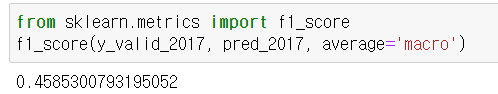

In [ ]:
clf2017_200 = ExtraTreesClassifier(n_estimators=200, random_state = RANDOM_STATE)
clf2017_200.fit(X_train_2017, y_train_2017)

In [ ]:
pred_2017_200 = clf2017_200.predict(X_valid_2017)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_valid_2017, pred_2017_200, average='macro')

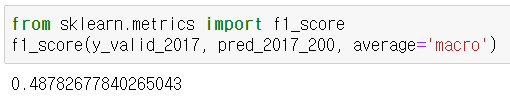

In [ ]:
clf2017_300 = ExtraTreesClassifier(n_estimators=300, random_state = RANDOM_STATE)
clf2017_300.fit(X_train_2017, y_train_2017)

In [ ]:
pred_2017_300 = clf2017_300.predict(X_valid_2017)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_valid_2017, pred_2017_300, average='macro')

In [63]:
from catboost import CatBoostClassifier

In [64]:
cat = CatBoostClassifier(iterations=30)
cat.fit(X_train_2017, y_train_2017)

Learning rate set to 0.5
0:	learn: 6.0252181	total: 15.7s	remaining: 7m 36s
1:	learn: 5.6479230	total: 31.9s	remaining: 7m 26s
2:	learn: 5.3552233	total: 48.9s	remaining: 7m 19s
3:	learn: 4.9716866	total: 1m 11s	remaining: 7m 46s
4:	learn: 4.7567589	total: 1m 28s	remaining: 7m 22s
5:	learn: 4.5435565	total: 1m 45s	remaining: 7m 3s
6:	learn: 4.3646767	total: 2m 1s	remaining: 6m 40s
7:	learn: 4.1921997	total: 2m 17s	remaining: 6m 17s
8:	learn: 4.0000073	total: 2m 36s	remaining: 6m 4s
9:	learn: 3.8356729	total: 2m 53s	remaining: 5m 47s
10:	learn: 3.6468028	total: 3m 8s	remaining: 5m 24s
11:	learn: 3.4405008	total: 3m 21s	remaining: 5m 2s
12:	learn: 3.2728279	total: 3m 37s	remaining: 4m 44s
13:	learn: 3.1617612	total: 3m 51s	remaining: 4m 24s
14:	learn: 3.0052373	total: 4m 6s	remaining: 4m 6s
15:	learn: 2.8507316	total: 4m 23s	remaining: 3m 50s
16:	learn: 2.7043590	total: 4m 38s	remaining: 3m 32s
17:	learn: 2.5841176	total: 4m 54s	remaining: 3m 16s
18:	learn: 2.4581683	total: 5m 11s	remain

In [65]:
# make the prediction using the resulting model
pred_2017_cat = cat.predict(X_valid_2017)
prob_2017_cat = cat.predict_proba(X_valid_2017)

In [66]:
from sklearn.metrics import f1_score
f1_score(y_valid_2017, pred_2017_cat, average='macro')

0.29191148351554297

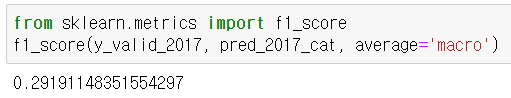

In [70]:
cat_multiclass = CatBoostClassifier(iterations=100, loss_function='MultiClass')
cat_multiclass.fit(X_train_2017, y_train_2017)

Learning rate set to 0.5
0:	learn: 6.0252181	total: 14.6s	remaining: 24m 3s
1:	learn: 5.6479230	total: 28.9s	remaining: 23m 35s
2:	learn: 5.3552233	total: 42.4s	remaining: 22m 51s
3:	learn: 4.9716866	total: 55.8s	remaining: 22m 18s
4:	learn: 4.7567589	total: 1m 9s	remaining: 22m 6s
5:	learn: 4.5435565	total: 1m 23s	remaining: 21m 47s
6:	learn: 4.3646767	total: 1m 36s	remaining: 21m 28s
7:	learn: 4.1921997	total: 1m 50s	remaining: 21m 9s
8:	learn: 4.0000073	total: 2m 3s	remaining: 20m 52s
9:	learn: 3.8356729	total: 2m 17s	remaining: 20m 35s
10:	learn: 3.6468028	total: 2m 30s	remaining: 20m 20s
11:	learn: 3.4405008	total: 2m 44s	remaining: 20m 4s
12:	learn: 3.2728279	total: 2m 58s	remaining: 19m 55s
13:	learn: 3.1617612	total: 3m 12s	remaining: 19m 40s
14:	learn: 3.0052373	total: 3m 25s	remaining: 19m 25s
15:	learn: 2.8507316	total: 3m 39s	remaining: 19m 10s
16:	learn: 2.7043590	total: 3m 51s	remaining: 18m 52s
17:	learn: 2.5841176	total: 4m 5s	remaining: 18m 39s
18:	learn: 2.4581683	tot

In [71]:
# make the prediction using the resulting model
pred_2017_cat_multiclass = cat_multiclass.predict(X_valid_2017)
prob_2017_cat_multiclass = cat_multiclass.predict_proba(X_valid_2017)

In [72]:
from sklearn.metrics import f1_score
f1_score(y_valid_2017, pred_2017_cat_multiclass, average='macro')

0.4037574227665002

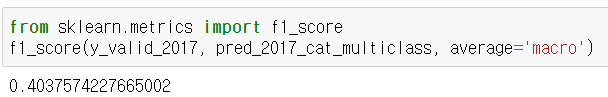

In [73]:
cat_multiclass_200 = CatBoostClassifier(iterations=200, loss_function='MultiClass')
cat_multiclass_200.fit(X_train_2017, y_train_2017)

Learning rate set to 0.341853
0:	learn: 6.0417251	total: 13.5s	remaining: 44m 48s
1:	learn: 5.8006068	total: 27.9s	remaining: 46m 5s
2:	learn: 5.5876688	total: 42.5s	remaining: 46m 30s
3:	learn: 5.3023286	total: 56.3s	remaining: 45m 57s
4:	learn: 5.1167141	total: 1m 10s	remaining: 45m 51s
5:	learn: 4.9489414	total: 1m 24s	remaining: 45m 24s
6:	learn: 4.7883004	total: 1m 37s	remaining: 44m 51s
7:	learn: 4.6516191	total: 1m 51s	remaining: 44m 29s
8:	learn: 4.4738417	total: 2m 5s	remaining: 44m 17s
9:	learn: 4.3439121	total: 2m 18s	remaining: 43m 56s
10:	learn: 4.1870338	total: 2m 32s	remaining: 43m 33s
11:	learn: 4.0218418	total: 2m 46s	remaining: 43m 24s
12:	learn: 3.8720959	total: 3m	remaining: 43m 17s
13:	learn: 3.7645984	total: 3m 14s	remaining: 42m 58s
14:	learn: 3.6358640	total: 3m 27s	remaining: 42m 39s
15:	learn: 3.5118171	total: 3m 40s	remaining: 42m 17s
16:	learn: 3.3741316	total: 3m 53s	remaining: 41m 52s
17:	learn: 3.2790161	total: 4m 6s	remaining: 41m 31s
18:	learn: 3.169074

150:	learn: 0.1765368	total: 32m 58s	remaining: 10m 42s
151:	learn: 0.1748141	total: 33m 11s	remaining: 10m 28s
152:	learn: 0.1725707	total: 33m 24s	remaining: 10m 15s
153:	learn: 0.1707041	total: 33m 37s	remaining: 10m 2s
154:	learn: 0.1683488	total: 33m 50s	remaining: 9m 49s
155:	learn: 0.1659156	total: 34m 5s	remaining: 9m 36s
156:	learn: 0.1633772	total: 34m 18s	remaining: 9m 23s
157:	learn: 0.1619649	total: 34m 30s	remaining: 9m 10s
158:	learn: 0.1603198	total: 34m 42s	remaining: 8m 57s
159:	learn: 0.1585494	total: 34m 56s	remaining: 8m 44s
160:	learn: 0.1563466	total: 35m 12s	remaining: 8m 31s
161:	learn: 0.1548301	total: 35m 25s	remaining: 8m 18s
162:	learn: 0.1528454	total: 35m 38s	remaining: 8m 5s
163:	learn: 0.1514549	total: 35m 52s	remaining: 7m 52s
164:	learn: 0.1498183	total: 36m 5s	remaining: 7m 39s
165:	learn: 0.1483681	total: 36m 18s	remaining: 7m 26s
166:	learn: 0.1462051	total: 36m 31s	remaining: 7m 13s
167:	learn: 0.1452375	total: 36m 43s	remaining: 6m 59s
168:	learn

In [74]:
# make the prediction using the resulting model
pred_2017_cat_multiclass_200 = cat_multiclass_200.predict(X_valid_2017)
prob_2017_cat_multiclass_200 = cat_multiclass_200.predict_proba(X_valid_2017)

In [75]:
from sklearn.metrics import f1_score
f1_score(y_valid_2017, pred_2017_cat_multiclass_200, average='macro')

0.4504248940227167

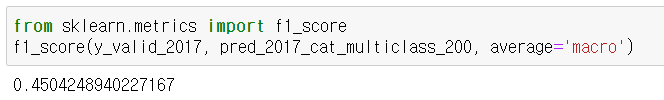

In [78]:
cat_multiclass_f1 = CatBoostClassifier(iterations=50, 
                                        loss_function='MultiClass',
                                       random_state=RANDOM_STATE,
                                       #task_type='gpu',
                                       eval_metric='TotalF1',
                                       )
cat_multiclass_f1.fit(X_train_2017, y_train_2017)

Learning rate set to 0.5
0:	learn: 0.0213398	total: 16s	remaining: 13m 2s
1:	learn: 0.0237481	total: 30.7s	remaining: 12m 16s
2:	learn: 0.0371656	total: 44.6s	remaining: 11m 38s
3:	learn: 0.0567862	total: 1m 4s	remaining: 12m 23s
4:	learn: 0.0742377	total: 1m 30s	remaining: 13m 34s
5:	learn: 0.0979187	total: 1m 49s	remaining: 13m 22s
6:	learn: 0.1441459	total: 2m 4s	remaining: 12m 47s
7:	learn: 0.1875369	total: 2m 19s	remaining: 12m 13s
8:	learn: 0.2282652	total: 2m 35s	remaining: 11m 48s
9:	learn: 0.2638164	total: 2m 51s	remaining: 11m 27s
10:	learn: 0.3095347	total: 3m 9s	remaining: 11m 10s
11:	learn: 0.3533312	total: 3m 23s	remaining: 10m 45s
12:	learn: 0.3859708	total: 3m 38s	remaining: 10m 22s
13:	learn: 0.4271092	total: 3m 57s	remaining: 10m 10s
14:	learn: 0.4694774	total: 4m 14s	remaining: 9m 54s
15:	learn: 0.4994725	total: 4m 31s	remaining: 9m 36s
16:	learn: 0.5386125	total: 4m 46s	remaining: 9m 15s
17:	learn: 0.5682090	total: 5m 1s	remaining: 8m 56s
18:	learn: 0.6085480	total:

In [79]:
# make the prediction using the resulting model
pred_2017_cat_multiclass_f1 = cat_multiclass_f1.predict(X_valid_2017)
prob_2017_cat_multiclass_f1 = cat_multiclass_f1.predict_proba(X_valid_2017)

In [80]:
from sklearn.metrics import f1_score
f1_score(y_valid_2017,pred_2017_cat_multiclass_f1, average='macro')

0.3540240239393157

### 2018

In [ ]:
clf2018 = ExtraTreesClassifier(n_estimators=100, random_state = RANDOM_STATE)
clf2018.fit(know_train[1][use_cols_2018], know_train[1]['knowcode'])

### 2019

In [ ]:
clf2019 = ExtraTreesClassifier(n_estimators=100, random_state = RANDOM_STATE)
clf2019.fit(know_train[2][use_cols_2019], know_train[2]['knowcode'])

### 2020

In [ ]:
clf2020 = ExtraTreesClassifier(n_estimators=100, random_state = RANDOM_STATE)
clf2020.fit(know_train[3][use_cols_2020], know_train[3]['knowcode'])

### Trainset shape 정리

 + 2017: (9486, 155)
 + 2018: (9072, 130)
 + 2019: (8555, 152)
 + 2020: (8122, 185)

## Testset 불러오기

마찬가지로 년도별로 DataFrame으로 불러온 후 리스트에 할당합니다.


In [ ]:
TEST_PATH_2017 = DATA_PATH + "test/KNOW_2017_test.csv"
TEST_PATH_2018 = DATA_PATH + "test/KNOW_2018_test.csv"
TEST_PATH_2019 = DATA_PATH + "test/KNOW_2019_test.csv"
TEST_PATH_2020 = DATA_PATH + "test/KNOW_2020_test.csv"

TEST_PATHs = [TEST_PATH_2017, TEST_PATH_2018, TEST_PATH_2019, TEST_PATH_2020]

In [ ]:
know_test = [pd.read_csv(path) for path in TEST_PATHs]
know_test[0].head() # 2017년도 test 샘플

In [ ]:
know_test[1]['bq222']

## Train과 똑같은 전처리

2018년 자료에 이상하게 원핫인코딩된 문항 수정

전처리: categorical column이어야 하는 bq22, bq23, bq24가 제멋대로 bq231, bq232.. 로 표기되어 있음... 원핫인코딩도 아니고 레이블인코딩도 아닌 무언가...

In [ ]:
know_test[1][['bq221',
              'bq222',
              'bq223',
              'bq231',
              'bq232',
              'bq233',
              'bq234',
              'bq235',
              'bq241',
              'bq242',
              'bq243',
              'bq244',
              'bq245',]]

In [ ]:
know_test[1]['bq22'] =  know_test[1]['bq221'] + know_test[1]['bq222'] + know_test[1]['bq223']

In [ ]:
know_test[1]['bq23'] =  know_test[1]['bq231'] + know_test[1]['bq232'] + know_test[1]['bq233']+\
                         know_test[1]['bq234'] + know_test[1]['bq235']

In [ ]:
know_test[1]['bq24'] =  know_test[1]['bq241'] + know_test[1]['bq242'] + know_test[1]['bq243']+\
                         know_test[1]['bq244'] + know_test[1]['bq245']

In [ ]:
know_test[1].drop(['bq221',
              'bq222',
              'bq223',
              'bq231',
              'bq232',
              'bq233',
              'bq234',
              'bq235',
              'bq241',
              'bq242',
              'bq243',
              'bq244',
              'bq245',], axis=1, inplace=True)

half cols 전처리

In [ ]:
for i in range(4):
    know_test[i]['bq6_mark']= 0
    know_test[i]['bq6_mark'].loc[know_test[i]['bq6'] == 7] = 1
    know_test[i]['bq12_2_mark']= 0
    know_test[i]['bq12_2_mark'].loc[know_test[i]['bq12_2'] == 9] = 1
    know_test[i]['bq12_3_mark']= 0
    know_test[i]['bq12_3_mark'].loc[know_test[i]['bq12_3'] == 9] = 1
    know_test[i]['bq12_4_mark']= 0
    know_test[i]['bq12_4_mark'].loc[know_test[i]['bq12_4'] == 9] = 1

In [ ]:
for i in range(4):
    know_test[i].loc[know_test[i]['bq6'] == 7, 'bq6'] = 3 # median filling
    know_test[i].loc[know_test[i]['bq12_2'] == 9, 'bq12_2'] = 3 # median filling
    know_test[i].loc[know_test[i]['bq12_3'] == 9, 'bq12_3'] = 3 # median filling
    know_test[i].loc[know_test[i]['bq12_4'] == 9, 'bq12_4'] = 3 # median filling

In [ ]:
for i in range(4):
    print("Train Size")
    print(know_train[i].shape)
    print("Test Size")
    print(know_test[i].shape)

2 차이는 'description'과 'knowcode'

## 테스트셋 추출 및 학습

ID 값을 제외한 나머지 데이터를 이용하여 모델에 넣어 추론합니다.

In [ ]:
use_cols_2017 = [col for col in know_train[0] if col not in no_match_cols_2017]
use_cols_2018 = [col for col in know_train[1] if col not in no_match_cols_2018]
use_cols_2019 = [col for col in know_train[2] if col not in no_match_cols_2019]
use_cols_2020 = [col for col in know_train[3] if col not in no_match_cols_2020]

In [ ]:
know_train[0][use_cols_2017].shape

In [ ]:
know_test[0][use_cols_2017].shape

In [ ]:
pred2017 = clf2017.predict(know_test[0][use_cols_2017])

In [ ]:
pred2018 = clf2018.predict(know_test[1][use_cols_2018])

In [ ]:
pred2019 = clf2019.predict(know_test[2][use_cols_2019])

In [ ]:
pred2020 = clf2020.predict(know_test[3][use_cols_2020])

In [ ]:
et_predicts = list(pred2017) + list(pred2018) + list(pred2019) + list(pred2020)

# 제출

In [ ]:
submission = pd.read_csv('../data_0103/sample_submission.csv') # sample submission 불러오기

In [ ]:
submission['knowcode'] = et_predicts

submission.to_csv('../submission_files/et_with_manual_preprocess_data0113.csv', index=False)